In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/processed/clean_data.csv")
data

,Marital status,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,Educational special needs,...,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (pass rate),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (pass rate),Curricular units 2nd sem (grade),Target
0,1,5,1,1,122.0,19,12,127.3,1,0,...,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0
1,1,1,1,1,160.0,1,3,142.5,1,0,...,0,6,6,1.000000,14.000000,6,6,1.000000,13.666667,2
2,1,5,1,1,122.0,37,37,124.8,1,0,...,0,6,0,0.000000,0.000000,6,0,0.000000,0.000000,0
3,1,2,1,1,122.0,38,37,119.6,1,0,...,0,6,6,1.000000,13.428571,6,5,0.833333,12.400000,2
4,2,1,0,1,100.0,37,38,141.5,0,0,...,0,6,5,0.833333,12.333333,6,6,1.000000,13.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,1,125.0,1,1,122.2,0,0,...,0,6,5,0.833333,13.600000,6,5,0.833333,12.666667,2
4420,1,2,1,1,120.0,1,1,119.0,1,0,...,1,6,6,1.000000,12.000000,6,2,0.333333,11.000000,0
4421,1,1,1,1,154.0,37,37,149.5,1,0,...,0,7,7,1.000000,14.912500,8,1,0.125000,13.500000,0
4422,1,1,1,1,180.0,37,37,153.8,1,0,...,0,5,5,1.000000,13.800000,5,5,1.000000,12.000000,2


In [3]:
data['Target'] = data['Target'].map({0: 0, 1: 1, 2: 1})

In [4]:
data

,Marital status,Application order,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,Educational special needs,...,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (pass rate),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (pass rate),Curricular units 2nd sem (grade),Target
0,1,5,1,1,122.0,19,12,127.3,1,0,...,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0
1,1,1,1,1,160.0,1,3,142.5,1,0,...,0,6,6,1.000000,14.000000,6,6,1.000000,13.666667,1
2,1,5,1,1,122.0,37,37,124.8,1,0,...,0,6,0,0.000000,0.000000,6,0,0.000000,0.000000,0
3,1,2,1,1,122.0,38,37,119.6,1,0,...,0,6,6,1.000000,13.428571,6,5,0.833333,12.400000,1
4,2,1,0,1,100.0,37,38,141.5,0,0,...,0,6,5,0.833333,12.333333,6,6,1.000000,13.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,1,1,125.0,1,1,122.2,0,0,...,0,6,5,0.833333,13.600000,6,5,0.833333,12.666667,1
4420,1,2,1,1,120.0,1,1,119.0,1,0,...,1,6,6,1.000000,12.000000,6,2,0.333333,11.000000,0
4421,1,1,1,1,154.0,37,37,149.5,1,0,...,0,7,7,1.000000,14.912500,8,1,0.125000,13.500000,0
4422,1,1,1,1,180.0,37,37,153.8,1,0,...,0,5,5,1.000000,13.800000,5,5,1.000000,12.000000,1


In [5]:
data['overall_pass_rate'] = (
    data['Curricular units 1st sem (approved)'] +
    data['Curricular units 2nd sem (approved)']
) / (
    data['Curricular units 1st sem (enrolled)'] +
    data['Curricular units 2nd sem (enrolled)']
)
data['grade_diff'] = (
    data['Curricular units 2nd sem (grade)'] -
    data['Curricular units 1st sem (grade)']
)
data['financial_risk'] = data['Debtor'] - data['Scholarship holder']
data['grade_x_passrate'] = (
    data['Curricular units 1st sem (grade)'] *
    data['Curricular units 1st sem (pass rate)']
)

In [6]:
features = [
    'Age at enrollment',
    'Admission grade',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Displaced',
    'Educational special needs',
    'Gender'
]

In [7]:
engineered_features = [
    'overall_pass_rate',
    'grade_diff',
    'financial_risk',
    'grade_x_passrate'
]

all_features = features + engineered_features

Accuracy: 0.7954802259887006
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       285
           1       0.87      0.82      0.84       600

    accuracy                           0.80       885
   macro avg       0.77      0.78      0.77       885
weighted avg       0.80      0.80      0.80       885



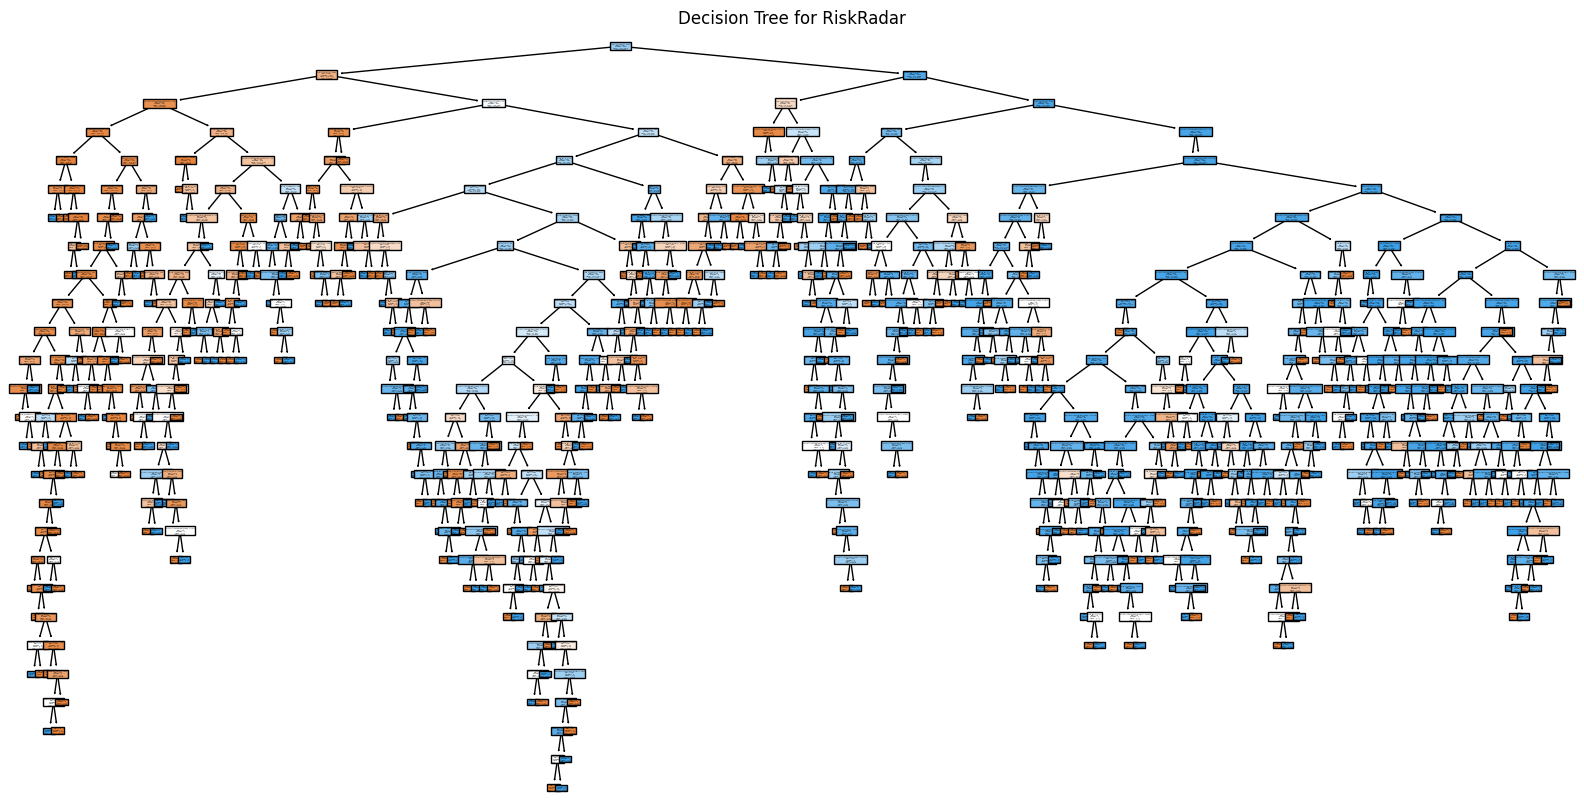

In [8]:
X = data[all_features]
y = data['Target']

# One-hot encoding
X = pd.get_dummies(X, drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

tree = DecisionTreeClassifier(random_state = 10)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Dropout', 'No Risk'])
plt.title("Decision Tree for RiskRadar")
plt.show()